## Load the test dataset

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the test dataset for plotting
df = pd.read_csv("../data/data_modeltype_gamma.csv")

# Preview first rows
df.head()

,category,predictor,Estimate,CI_low,CI_high,p_value,outcome
0,category1,predictor1,0.019167,0.012294,0.026040,4.606853e-08,outcome1
1,category2,predictor2,0.038696,-0.017680,0.095071,1.785258e-01,outcome1
2,category3,predictor3,0.008308,-0.083909,0.100525,8.598415e-01,outcome1
3,category4,predictor4,0.009834,-0.040279,0.059948,7.005215e-01,outcome1
4,category1,predictor5,-0.013475,-0.055834,0.028884,5.329560e-01,outcome1


In [2]:
# --- DEBUG CELL: tweak one row to simulate extreme values (no file writes) ---
# Run this after loading `df` and before calling forest_plot()

df_debug = df.copy()

mask = (df_debug["predictor"] == "predictor1") & (df_debug["outcome"] == "outcome1")

# Example 1: if your input is on LOG scale (Estimate/beta/Coef), set log-values:
# target ratio = 3.50 with 95% CI [2.00, 6.00]
if {"Estimate", "CI_low", "CI_high"}.issubset(df_debug.columns):
    import numpy as np
    df_debug.loc[mask, "Estimate"] = np.log(3.50)
    df_debug.loc[mask, "CI_low"] = np.log(2.00)
    df_debug.loc[mask, "CI_high"] = np.log(6.00)

# Example 2: if your input is already ratio scale (Ratio/OR/effect), set directly:
if {"Ratio", "CI_low", "CI_high"}.issubset(df_debug.columns):
    df_debug.loc[mask, "Ratio"] = 3.50
    df_debug.loc[mask, "CI_low"] = 2.00
    df_debug.loc[mask, "CI_high"] = 6.00

if {"OR", "CI_low", "CI_high"}.issubset(df_debug.columns):
    df_debug.loc[mask, "OR"] = 3.50
    df_debug.loc[mask, "CI_low"] = 2.00
    df_debug.loc[mask, "CI_high"] = 6.00

if {"effect", "ci_low", "ci_high"}.issubset(df_debug.columns):
    df_debug.loc[mask, "effect"] = 3.50
    df_debug.loc[mask, "ci_low"] = 2.00
    df_debug.loc[mask, "ci_high"] = 6.00

# Optional p-value tweak
if "p_value" in df_debug.columns:
    df_debug.loc[mask, "p_value"] = 1e-6

display(df_debug.loc[mask].head(1))

# Then call:
# forest_plot(df_final=df_debug, outcomes=["outcome1","outcome2"], model_type="gamma", ...)


,category,predictor,Estimate,CI_low,CI_high,p_value,outcome
0,category1,predictor1,1.252763,0.693147,1.791759,0.000001,outcome1


## Plot Function

---

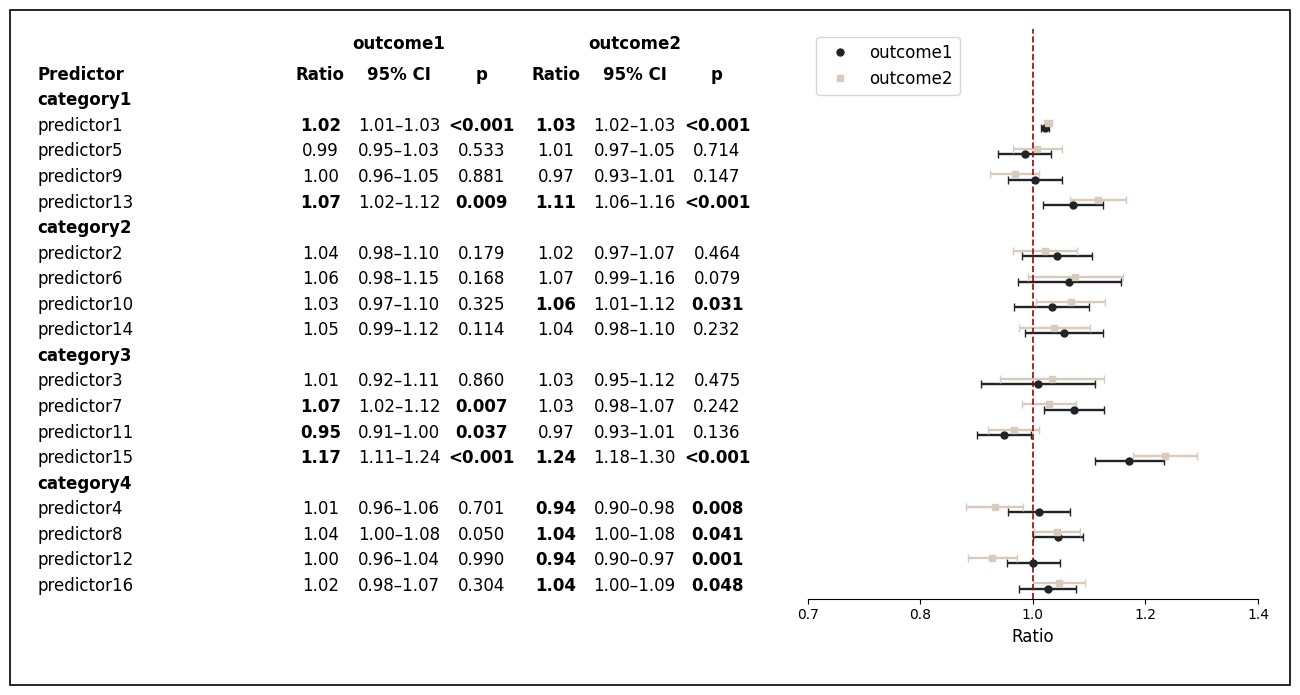

In [5]:
import os
from pathlib import Path
import sys

# Add src folder to sys.path for utility imports
src_path = Path.cwd() / "../src"
if str(src_path) not in sys.path:
    sys.path.append(str(src_path))

from forestplotx.plot import forest_plot

forest_plot(
    df_final=df,
    outcomes=["outcome1","outcome2"],
    model_type='gamma',
    font_size=12,
    save=False,
    show_general_stats=False,
    tick_style="decimal",
)